<a href="https://colab.research.google.com/github/striderssoftware/Artificial_Intelligence/blob/main/PaddlePaddlePlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

strider was here
The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/1
step 1875/1875 [==============================] - loss: 0.6614 - acc: 0.7262 - 6ms/step                            





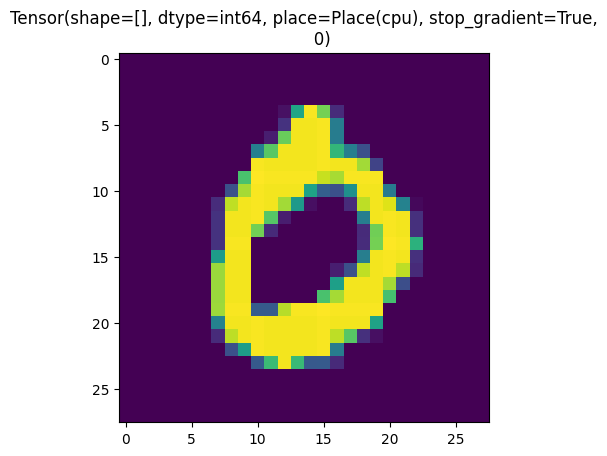

strider was here:ENDEE


In [2]:
#!pip install paddlepaddle

print ("strider was here")

import paddle
import paddle.nn as nn
import paddle.vision.transforms as T
from paddle.static import InputSpec
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import paddle.vision.transforms as transforms
from PIL import Image

device = paddle.set_device('cpu') # or 'gpu'

net = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(784, 200),
    nn.Tanh(),
    nn.Linear(200, 10))

model = paddle.Model(net)
optim = paddle.optimizer.SGD(learning_rate=1e-3,
    parameters=model.parameters())

model.prepare(optim,
              paddle.nn.CrossEntropyLoss(),
	      paddle.metric.Accuracy())

transform = T.Compose([
        T.Transpose(),
	T.Normalize([127.5], [127.5])
	])


data = paddle.vision.datasets.MNIST(mode='train', transform=transform)
model.fit(data, epochs=1, batch_size=32, verbose=1)

index = 3

testData = paddle.vision.datasets.MNIST(mode='test', transform=transform)
testArray = np.array(testData[index][0])
output = model.predict_batch([testArray])

testData2 = paddle.vision.datasets.MNIST(mode='test')

image, label = testData2[index]

print ('\n\n')

#  Results: Map results into solution space
x = paddle.to_tensor(output)
m = paddle.nn.Softmax()
winner = paddle.argmax(m(x))

plt.figure()
plt.imshow(image)
plt.grid(False)
plt.title(winner)
plt.show()

print ("strider was here:ENDEE")